# Exercise 1 - Getting Started (30 mins)

## Objectives
- To become familiar with Python and Jupyter Notebooks
- To be able to generate discrete signals in Python 

## Instructions
- At the start of each exercise, run all code before you begin. In the toolbar above, click Cell > Run All

## Video ([Backup Link](https://www.youtube.com/watch?v=qukAMhN5RfQ))

In [8]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/qukAMhN5RfQ?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise

### Sinusoidal Signals
A continuous-time sinusoid is given by $x(t)=A\sin(2\pi f t +\phi)=A\sin(\omega t +\phi)$, where $A$ is the amplitude, $t$ is time in seconds, $f$ is the frequency in Hertz (or $\omega$ in radians), and $\phi$ is the initial phase in radians. 

Because Python is a numerical computing tool, we can plot functions numerically over a defined range of values. Now let us create a plot of a sine wave with a frequency, $f$, of 1 KHz using $N=128$ data points for $0\leq t<5$ ms. 

---

**Question 1.1** Before plotting, calculate the expected number of cycles of sine wave.

To check your answer, let us now plot the sine wave. In Python you can create a vector, `t`, with 128 elements by running code in the following cell:

In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

# define  constants
fsig = 1000
Nsamp = 128
t = np.linspace(0,0.005,Nsamp,endpoint=False)

>**GTA Tip**
>
>In Python:
>- You do not need to declare variables
>- Anything between <code>#</code> and newline is a comment
>- The result of a statement can be printed with the <code>print()</code> command
>- There are several ways in Python you can use to create a vector. The first way is used above: <code>linspace(start,end,no_of_points,endpoint)</code> endpoint is a flag to indicate if the endpoint should be included in the vector.
>- Another way uses the <code>np.arange(start, end, increment)</code> command and <code>increment=1</code> by default. Therefore, <code>np.arange(0, 5)</code> will create a row vector containing five elements  vector $x=[0\: 1\: 2\: 3\: 4]$.
>- Check out the documentation: https://numpy.org/doc/stable/reference/

Sometimes, it can be useful to check the dimension(s) of matrices. This can be done using the `np.shape(x)` command which will report the dimension(s) of `x` as row by column. Let us now check the dimension(s) of `n`:

In [10]:
print('Dimension(s) of t:')
print(np.shape(t))
print('\n') # \n creates a newline
print('t:')
print(np.round(t,3))

Dimension(s) of t:
(128,)


t:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


To create the sine wave $x(t)=\sin(2\pi f t)$, simply execute the next cell.

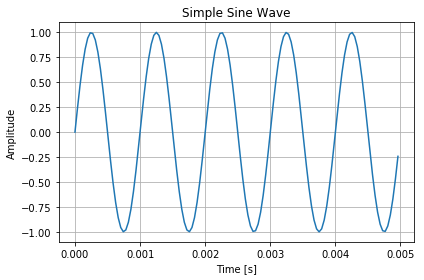

In [11]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()

>**GTA Tip**
>
>Check that $x$ and $n$ have the same dimensions. Python performs 'broadcasting' so that algorithms can be written more efficiently (see https://numpy.org/doc/stable/user/basics.broadcasting.html).

Since plotting signals will be used many times in this coursework, you have been provided with a plotting function, `plot_signal()`, in the `lab_functions.py` file. To use the function, we need to first import:

```python
from functions.lab_functions import plot_signal
```

To save the plots we have created, we can use the `plt.savefig('title')` command. For example:

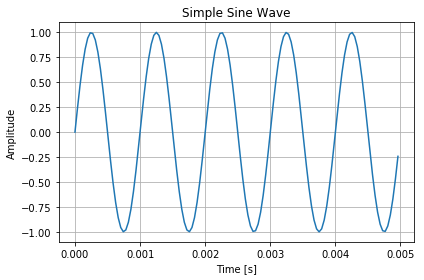

In [12]:
x = np.sin(2*np.pi*fsig*t);

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex1/ex1_simple_sine_save.pdf')
plt.show()

The plot created above, `ex1_simple_sine_save.pdf`, will have also been saved to the `/results/ex1/` folder so you now have a record of the plot.

### Sampled Sine Wave

Consider a discrete-time sine wave: $x[n]=A\sin(\Omega n +\phi)$ obtained by sampling the continuous-time signal at a sampling rate of $f_s=1/T_s$, where $A$ is the amplitude, $\Omega$ is the normalised angular frequency and $\phi$ is the phase. This is mathematically represented by:

$$x[n]=x(t)|_{t=nT_s}=A\sin(\omega n T_s + \phi) = A \sin(\Omega n + \phi),$$

where $|_{t=nT_s}$ represents the evaluation of $t$ at discrete points $nT_s$ using the following definition.

---
**Definition:**
$$\Omega=\frac{\omega}{f_s} =2\pi\frac{f}{f_s}=2\pi F, \quad \text{where }F=\frac{f}{f_s} \text{ and } \omega = 2\pi f$$

It is common to use $f$ for 'real' frequencies and $\omega$ for 'real' angular frequencies. The scaled versions are $F$ for normalised frequency and $\Omega$ for normalised angular frequency. The unit of $\Omega$ is 'radians per sample' and $F$ is 'cycles per sample'.

---

Now let us create a plot of a sampled sine wave with a frequency, $f$, of 1 KHz and a sampling frequency, $f_s$, of 25.6 kHz, where $N=128$ implies that 128 data points should be generated. 

To create the sine wave  $x[n]=\sin(2\pi \frac{f}{f_s}n)$ , simply execute the next cell

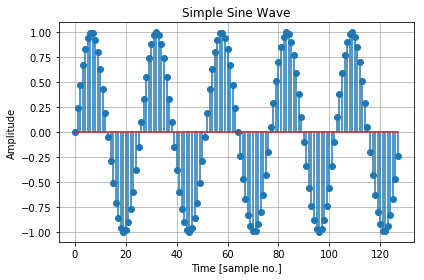

In [13]:
fs = 25600
n = t*fs
x = np.sin(2*np.pi*fsig/fs*n)

plt = plot_signal(n, x, title='Simple Sine Wave', xlabel='Time [sample no.]', ylabel='Amplitude',func='stem')
plt.show()

The first 'Simple Sine Wave' figure is a plot of `x` against time `t`. After sampling, however, we obtain a plot of amplitude `x` against sample index `n`.

**Question 1.2** Can you explain the differences between `n` and `t`? What is the range of values of `n`?

**Question 1.3** For this sampled sine example, calculate $\omega$, and $\Omega$?

>**GTA Tip**
>
>You can also plot the sine wave using circle markers for each discrete point by entering the command `ax.plot(t, x, marker='o')` and change the colour of the line to red with `ax.plot(t, x, color='red')`. The output here is plotted as discrete points using the command `ax.stem(t, x)`. The plot window can also be divided into two sub-plots using the `fig, axs = plt.subplots(2, 1)` command. The `ax.set_xlim((lower_limit, upper_limit))` command allows us to examine particular region of the plot (go to '<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html>' to discover more). These options can be incorporated into the `plot_signal` function that we have written.

---

Since sine waves are useful waveforms, let us write a function to generate them for any signal frequency, $f$, sampling frequency, $f_s$, and number of samples, $N$. In Python, functions are stored as in file(s) with extension '**.py**'. To make your life easier, we have written this function for you in the `lab_functions.py` file stored in the functions folder.

The `sinegen` function defined in the `lab_functions.py` file is given below:

```python
def sinegen(fs, fsig, Nsamp):
    tsamp = 1/fs
    t = np.arange(0, Nsamp*tsamp, tsamp)
    y = np.sin(2*np.pi*fsig*t)
    return t, y
```

**Question 1.4** In the `sinegen` function, how can you use `linspace` instead of `arange` to generate `t`?


To test `sinegen` function, we first need to import it:

```python
from functions.lab_functions import sinegen
```

We can then execute the code using:

```python
y = sinegen(fs, fsig, Nsamp)
```

We can now write some code to reproduce the previous plot but this time utilising the `sinegen` function:

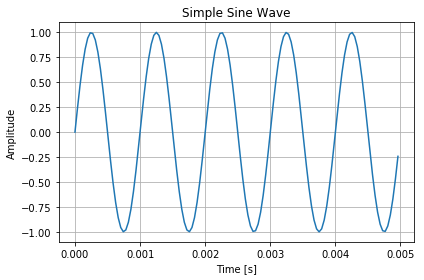

In [14]:
from functions.lab_functions import sinegen
t, x = sinegen(fs, fsig, Nsamp)

plt = plot_signal(t, x, title='Simple Sine Wave', xlabel='Time [s]', ylabel='Amplitude')
plt.show()